In [1]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy
# set parameters:
max_features = 250
maxlen = 30
batch_size = 4
embedding_dims = 32
filters = 8
kernel_size = 3
hidden_dims = 32
epochs = 20

Using TensorFlow backend.


In [0]:
import pandas as pd
df = pd.read_csv('dataset.csv',sep='\t', lineterminator='\r')
df = df.replace('\n','', regex=True)
df = df.replace("'","", regex =True)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)
tfidf = vectorizer.fit_transform(df['Tweet'].values.astype('U'))
y = vectorizer.idf_
z = vectorizer.vocabulary_
x_dataset = []
y_dataset = []
for i in range(len(df["Tweet"])-1):
    temp = []
    if int(df["sentimen"][i]) != 0:
      for item in df["Tweet"][i].split():
        if(len(item)>1):
            value = y[z[item.lower()]]
            temp.append(value)
      x_dataset.append(temp)
      y_dataset.append(int(df["sentimen"][i]))

for index, item in enumerate(y_dataset):
    if (item == -1):
        y_dataset[index] = 0


In [3]:
print('Pad sequences (samples x time)')
## Training dan testing
x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2, random_state=42)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

Pad sequences (samples x time)


Build model...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4383 samples, validate on 1096 samples
Epoch 1/20
4383/4383 [==============================] - 2s 535us/step - loss: 0.6889 - accuracy: 0.5334 - val_loss: 0.6765 - val_accuracy: 0.5766
Epoch 2/20
4383/4383 [==============================] - 2s 482us/step - loss: 0.6851 - accuracy: 0.5505 - val_loss: 0.6803 - val_accuracy: 0.5666
Epoch 3/20
4383/4383 [==============================] - 2s 485us/step - loss: 0.6819 - accuracy: 0.5590 - val_loss: 0.6711 - val_accuracy: 0.6022
Epoch 4/20
4383/4383 [==============================] - 2s 481us/step - loss: 0.6775 - accuracy: 0.5736 - val_loss: 0.6660 - val_accuracy: 0.5912
Epoch 5/20
4383/4383 [==============================] - 2s 484us/step - loss: 0.6753 - accuracy: 0.5845 - val_loss: 0.6686 - val_accuracy: 0.5894
Epoch 6/20
4383/4383 [==============================] - 2s 480us/step - loss: 0.6756 - accuracy: 0.5834 - val_loss: 0.6684 - val_accuracy: 0.5949
Epoch 7/20
4383/4383 [==============================] - 2s 489us/step - loss

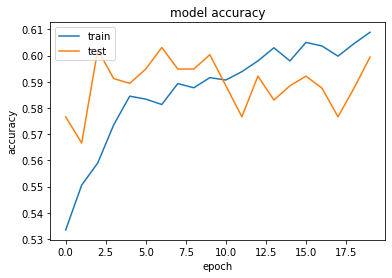

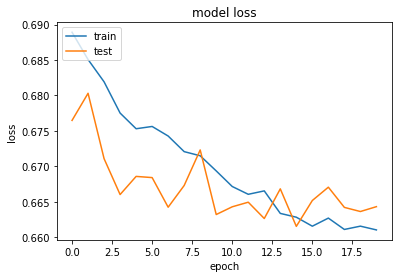

In [4]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
acc  = model.evaluate(x_test,y_test)
print("%s: %.2f%%" % (model.metrics_names[1], acc[1]*100))

1096/1096 [==============================] - 0s 38us/step
accuracy: 59.95%
